In [35]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    """
    This function calculates the upper limit and lower limit values for outlier analysis.

    IQR = Q1 - Q3
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

     Parameters
    ----------
    dataframe: DataFrame
        Dataframe to be processed
    col_name: str
        Column name to be processed
    q1: int, optional
        Percentage value for Q1 (default 0.25)
    q3: int, optional
        Percentage value for Q3 (default 0.75)

    Returns
    -------
    lower_limit, upper_limit: int, int
        Returns the lower limit and upper limit values used to identify outliers

    Examples
    -------
    import seaborn as sns
    df = sns.load_dataset("tips")
    lower_limit, upper_limit = outlier_thresholds(df, 'total_bill')
    print(lower_limit, upper_limit)

    """
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quantile3 - quantile1
    upper_limit = quantile3 + 1.5 * interquantile_range
    lower_limit = quantile1 - 1.5 * interquantile_range
    return lower_limit, upper_limit


def check_outlier(dataframe, col_name, **kwargs):
    """
    This function checks for outliers in the dataframe

    Parameters
    ----------
    dataframe: DataFrame
        Dataframe to be processed
    col_name: str
        Column name to be processed
    kwargs:
        It is used when you want to change the Q1 and Q3 values. (default q1=0.25, q3=0.75)

    Returns
    -------
    Returns boolean value

    Examples
    -------
    import seaborn as sns
    df = sns.load_dataset("tips")
    check_outlier(df, 'Age')
    # If you want change q1 and q3
    check_outlier(df, 'Age', q1=0.10, q3=0.90)

    """
    if len(kwargs) == 0:
        lower_limit, upper_limit = outlier_thresholds(dataframe, col_name)
    else:
        lower_limit, upper_limit = outlier_thresholds(dataframe, col_name, q1=kwargs['q1'], q3=kwargs['q3'])
    if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else:
        return False


def grab_outliers(dataframe, col_name, index=False, **kwargs):
    """
    This function is used to observe outliers.
    When it is desired to reach the indexes of outliers, the index values can be returned by setting the parameter.

    Parameters
    ----------
    dataframe: DataFrame
        Dataframe to be processed
    col_name: str
        Column name to be processed
    index: boolean, optional
        Used to access indexes of outliers (default False)
    kwargs:
        It is used when you want to change the Q1 and Q3 values. (default q1=0.25, q3=0.75)

    Returns
    -------
    outlier_index: list
        If index=True returns indexes of outliers

    Examples
    -------
    import seaborn as sns
    df = sns.load_dataset("tips")
    grab_outliers(df, 'Age')
    # If you want change q1 and q3
    grab_outliers(df, 'Age', q1=0.10, q3=0.90)
    # If you want to access indexes of outliers
    outlier_index = grab_outliers(df, 'Age', q1=0.10, q3=0.90 index=True)

    """
    if len(kwargs) == 0:
        lower_limit, upper_limit = outlier_thresholds(dataframe, col_name)
    else:
        lower_limit, upper_limit = outlier_thresholds(dataframe, col_name, kwargs['q1'], kwargs['q3'])
    if dataframe[((dataframe[col_name] < lower_limit) | (dataframe[col_name] > upper_limit))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < lower_limit) | (dataframe[col_name] > upper_limit))].head())
    else:
        print(dataframe[((dataframe[col_name] < lower_limit) | (dataframe[col_name] > upper_limit))])
    if index:
        outlier_index = dataframe[((dataframe[col_name] < lower_limit) | (dataframe[col_name] > upper_limit))].index
        return outlier_index


def remove_outlier(dataframe, col_name, **kwargs):
    """
    This function deletes outliers

    Parameters
    ----------
    dataframe: DataFrame
        Dataframe to be processed
    col_name: str
        Column name to be processed
    kwargs:
        It is used when you want to change the Q1 and Q3 values. (default q1=0.25, q3=0.75)

    Returns
    -------
    df_without_outliers: DataFrame
        Processed dataframe

    Examples
    -------
    import seaborn as sns
    df = sns.load_dataset("tips")
    remove_outlier(df, 'Age')
    # If you want change q1 and q3
    remove_outlier(df, 'Age', q1=0.10, q3=0.90)


    """
    if len(kwargs) == 0:
        lower_limit, upper_limit = outlier_thresholds(dataframe, col_name)
    else:
        lower_limit, upper_limit = outlier_thresholds(dataframe, col_name, kwargs['q1'], kwargs['q3'])
    df_without_outliers = dataframe[~((dataframe[col_name] < lower_limit) | (dataframe[col_name] > upper_limit))]
    return df_without_outliers


def replace_with_thresholds(dataframe, col_name, **kwargs):
    """
    This function replaces outliers with lower limit and upper limit values.

    Parameters
    ----------
    dataframe: DataFrame
        Dataframe to be processed
    col_name: str
        Column name to be processed
    kwargs:
        It is used when you want to change the Q1 and Q3 values. (default q1=0.25, q3=0.75)

    Examples
    -------
    import seaborn as sns
    df = sns.load_dataset("tips")
    replace_with_thresholds(df, 'Age')
    # If you want change q1 and q3
    replace_with_thresholds(df, 'Age', q1=0.10, q3=0.90)

    """
    if len(kwargs) == 0:
        lower_limit, upper_limit = outlier_thresholds(dataframe, col_name)
    else:
        lower_limit, upper_limit = outlier_thresholds(dataframe, col_name, kwargs['q1'], kwargs['q3'])
    dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
    dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit


def missing_values_table(dataframe, na_name=False):
    """
    This function calculates the numbers and ratios of the missing value.
    Returns a list of names of columns with missing values with parameter setting.

    Parameters
    ----------
    dataframe: DataFrame
        Dataframe to be processed
    na_name: bool
        Used to access column names with missing values. (default False)

    Returns
    -------
    na_columns: list
        If na_name=True returns a list of column names with missing values.

    Examples
    -------
    import pandas as pd
    import numpy as np
    import seaborn as sns
    df = sns.load_dataset("titanic")
    missing_values_table(df)
    # or
    na_columns = missing_values_table(df, na_name=True)

    """
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns


def missing_vs_target(dataframe, target, na_columns):
    """
    This function is used to analyze missing values.

    Parameters
    ----------
    dataframe: DataFrame
        Dataframe to be processed
    target: str
        Column name to be processed (target variable)
    na_columns: list
        List of columns with NA value

    Examples
    -------
    import seaborn as sns
    df = sns.load_dataset("tips")
    na_columns = missing_values_table(df, na_name=True)
    missing_vs_target(df, "total_bill", na_columns)

    """
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flag = temp_df.loc[:, temp_df.columns.str.contains('_NA_')].columns
    for col in na_flag:
        print(pd.DataFrame({'TARGET_MEAN': temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


def label_encoder(dataframe, binary_col):
    """
    This function converts categorical variables with binary class into numeric variables with label encoding.

    Parameters
    ----------
    dataframe: DataFrame
        Dataframe to be processed
    binary_col: str
        name of column with binary class

    Returns
    -------
        dataframe: DataFrame
            Processed dataframe

    Examples
    -------
    import seaborn as sns
    df = sns.load_dataset("tips")
    df = label_encoder(df, "sex")

    """
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


def one_hot_encoder(dataframe, categorical_cols, drop_first=False, dummy_na=False):
    """

    Parameters
    ----------
    dataframe: DataFrame
        Dataframe to be processed
    categorical_cols: str
        The name of the categorical column
    drop_first: boolean, optional
        get_dummies() parameter
    dummy_na: boolean, optional
        get_dummies() parameter
    Returns
    -------
    dataframe: DataFrame
        Processed dataframe

    Notes
    -------

    If drop_first=True, label encoding is also done.

    Examples
    -------
    import seaborn as sns
    df = sns.load_dataset("tips")
    df = one_hot_encoder(df, "day")
    # or
    df = one_hot_encoder(df, "day", drop_first=True, dummy_na=True)

    """
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dummy_na=dummy_na)
    return dataframe


def rare_analyser(dataframe, target, categorical_cols):
    """

    Parameters
    ----------
    dataframe: DataFrame
        Dataframe to be processed
    target: str
        The name of the target value
    categorical_cols: list
        List of category columns

    Examples
    -------
    import seaborn as sns
    from helpers.eda import grab_col_names
    df = sns.load_dataset("titanic")
    categorical_cols, _, _ = grab_col_names(df)
    rare_analyser(df, 'survived', categorical_cols)

    """
    for col in categorical_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            'TARGET_MEDIAN': dataframe.groupby(col)[target].median(),
                            "TATGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


# def rare_encoder(dataframe, rare_perc):
#     """
#
#     Parameters
#     ----------
#     dataframe: DataFrame
#         Dataframe to be processed
#     rare_perc: float
#         Threshold value to be used to identify rare variables
#
#     Returns
#     -------
#     dataframe: DataFrame
#         Processed dataframe
#
#     Examples
#     --------
#     import seaborn as sns
#     df = sns.load_dataset("titanic")
#     rare_encoder(df, 0.20)
#
#     """
#     temp_df = dataframe.copy()
#     rare_columns = [col for col in temp_df.columns if (temp_df[col].nunique() > 2)
#                     and (temp_df[col].nunique() < 10)
#                     and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
#
#     for var in rare_columns:
#         tmp = temp_df[var].value_counts() / len(temp_df)
#         rare_labels = tmp[tmp < rare_perc].index
#         temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
#
#     return temp_df


def rare_encoder(dataframe, rare_perc, cat_cols):
    temp_df = dataframe.copy()
    rare_columns = [col for col in cat_cols if (dataframe[col].value_counts() / len(temp_df) < .001).sum() > 1]
    for col in rare_columns:
        temp_df = dataframe[col].value_counts() / len(dataframe)
        rare_labels = temp_df[temp_df < rare_perc].index
        dataframe[col] = np.where(dataframe[col].isin(rare_labels), 'Rare', dataframe[col])
    return dataframe

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def check_dataframe(dataframe, head=5, tail=5):
    print("######################### Shape #############################")
    print(dataframe.shape)
    print("######################### Types #############################")
    print(dataframe.dtypes)
    print("######################### Head #############################")
    print(dataframe.head(head))
    print("######################### Tail #############################")
    print(dataframe.tail(tail))
    print("######################### NA #############################")
    print(dataframe.isnull().sum())
    print("######################### Describe #############################")
    print(dataframe.describe().T)
    print("######################### Quantiles ###############################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("####################################")
    if plot:
        sns.countplot(dataframe[col_name], data=dataframe)
        plt.show()


def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()


def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list



In [38]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# pd.set_option('display.max_rows', None)

######################################
# Exploratory Data Analysis
######################################

In [40]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df = train.append(test).reset_index(drop=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706.00000,Unf,0.00000,150.00000,856.00000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.00000,0.00000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00000,RFn,2.00000,548.00000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.00000
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.00000,Unf,0.00000,284.00000,1262.00000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.00000,1.00000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00000,RFn,2.00000,460.00000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.00000
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.00000,Unf,0.00000,434.00000,920.00000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.00000,0.00000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00000,RFn,2.00000,608.00000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.00000
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.00000,Unf,0.00000,540.00000,756.00000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.00000,0.00000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00000,Unf,3.00000,642.00000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.00000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.00000,Unf,0.00000,490.00000,1145.00000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.00000,0.00000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00000,RFn,3.00000,836.00000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.00000


In [41]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


##################
# Target Analysis
##################

In [42]:
df["SalePrice"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

count     1460.00000
mean    180921.19589
std      79442.50288
min      34900.00000
5%       88000.00000
10%     106475.00000
25%     129975.00000
50%     163000.00000
75%     214000.00000
80%     230000.00000
90%     278000.00000
95%     326100.00000
99%     442567.01000
max     755000.00000
Name: SalePrice, dtype: float64

In [43]:
# bağımlı değişkene göre korelasyonları hesaplayacak yüzde 60 da nbüyük ve küçük
def find_correlation(dataframe, numeric_cols, corr_limit=0.60):
    high_correlations = []
    low_correlations = []
    for col in numeric_cols:
        if col == "SalePrice":
            pass
        else:
            correlation = dataframe[[col, "SalePrice"]].corr().loc[col, "SalePrice"]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col + ": " + str(correlation))
            else:
                low_correlations.append(col + ": " + str(correlation))
    return low_correlations, high_correlations


low_corrs, high_corrs = find_correlation(df, num_cols)

Id -0.021916719443430967
MSSubClass -0.08428413512659509
LotFrontage 0.35179909657067737
LotArea 0.2638433538714051
OverallQual 0.7909816005838053
YearBuilt 0.5228973328794967
YearRemodAdd 0.5071009671113866
MasVnrArea 0.47749304709571444
BsmtFinSF1 0.3864198062421535
BsmtFinSF2 -0.011378121450215146
BsmtUnfSF 0.21447910554696928
TotalBsmtSF 0.6135805515591943
1stFlrSF 0.6058521846919153
2ndFlrSF 0.31933380283206736
LowQualFinSF -0.02560613000067955
GrLivArea 0.7086244776126515
TotRmsAbvGrd 0.5337231555820284
GarageYrBlt 0.4863616774878596
GarageArea 0.6234314389183622
WoodDeckSF 0.32441344456812926
OpenPorchSF 0.31585622711605504
EnclosedPorch -0.1285779579259566
3SsnPorch 0.04458366533574838
ScreenPorch 0.11144657114291112
PoolArea 0.09240354949187318
MiscVal -0.021189579640303213
MoSold 0.046432245223819446


######################################
# Data Preprocessing & Feature Engineering
######################################

In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706.00000,Unf,0.00000,150.00000,856.00000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.00000,0.00000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00000,RFn,2.00000,548.00000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.00000
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.00000,Unf,0.00000,284.00000,1262.00000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.00000,1.00000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00000,RFn,2.00000,460.00000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.00000
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.00000,Unf,0.00000,434.00000,920.00000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.00000,0.00000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00000,RFn,2.00000,608.00000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.00000
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.00000,Unf,0.00000,540.00000,756.00000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.00000,0.00000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00000,Unf,3.00000,642.00000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.00000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.00000,Unf,0.00000,490.00000,1145.00000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.00000,0.00000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00000,RFn,3.00000,836.00000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.00000


In [45]:
# Year
from datetime import date
todays_date = date.today()
todays_date.year

# Lot Frontage
df["LOTFRONTAGE_RATIO"] = df["LotFrontage"] / df["LotArea"] * 100
df["LOTFRONTAGE_RATIO"].fillna(0, inplace=True)

# Calculating the Age of the House by 2021
df["NEW_BUILDING_AGE"] = todays_date.year - df["YearBuilt"]

# Grouping of Calculated Ages
df["NEW_BUILDING_AGE_CAT"] = pd.qcut(df["NEW_BUILDING_AGE"], 4, labels=["New_house", "Middle_aged", "Middle_Old", "Old"])

# Difference between year of sale and year of manufacture
df["NEW_SOLD_DIFF"] = df["YrSold"] - df["YearBuilt"]

# House Demand 
df["NEW_HOUSE_DEMAND"] = pd.qcut(df["NEW_SOLD_DIFF"], 4, labels=["High_Demand", "Normal_Demand", "Less_Demand", "Least_Demand"])

# Garage age
df["NEW_GARAGE_AGE"] = df["GarageYrBlt"] - df["YearBuilt"]

# Garage year difference
df["NEW_GARAGE_YEAR_DIFF"] = df["GarageYrBlt"] - df["YearBuilt"]

# First floor ratio
df["NEW_FIRST_FLOOR_RATIO"] = df["1stFlrSF"] / df["GrLivArea"] * 100

# Uncomplete ratio:
df["NEW_UNCOMP_BSMT_RATIO"] = df["BsmtUnfSF"] / df["TotalBsmtSF"] * 100

# Total bath
df["NEW_TOTAL_BATH"] = (df["BsmtHalfBath"] + df["HalfBath"]) * 0.5 + df["BsmtFullBath"] + df["FullBath"]
df["NEW_TOTAL_FULL_BATH"] = df["FullBath"] + df["BsmtFullBath"]
df["NEW_TOTAL_HALF_BATH"] = df["HalfBath"] + df["BsmtHalfBath"] * 0.5

# Other Rooms
df["NEW_NEW_NUMBER_OF_OTHER_ROOM"] = df["TotRmsAbvGrd"] - df["KitchenAbvGr"] - df["BedroomAbvGr"]

# Average Room Area
df["NEW_AVERAGE_ROOM_AREA"] = df["GrLivArea"] / (df["TotRmsAbvGrd"] + df["NEW_TOTAL_BATH"])

# Total porch area
df["NEW_TOTAL_PORCH_AREA"] = df["WoodDeckSF"] + df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df[
    "ScreenPorch"]

# Garage ratio
df["NEW_GARAGE_RATIO"] = df["GarageArea"] / df["LotArea"] * 100

# Garage Area Per car
df["NEW_GARAGE_AREA_PER_CAR"] = df["GarageArea"] / df["GarageCars"]

# Total Garden Area:
df["NEW_GARDEN_AREA"] = df["LotArea"] - df["GarageArea"] - df["NEW_TOTAL_PORCH_AREA"] - df["TotalBsmtSF"]
df["NEW_GARDEN_RATIO"] = df["NEW_GARDEN_AREA"] / df["LotArea"] * 100
df["NEW_LOTAREA_CAT"] = pd.qcut(df["LotArea"],4,["Small","Medium","Big","Huge"])

# Total SF
df['TotalSF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])

# 1. Floor and Basement m^2
df["NEW_SF"] = df["1stFlrSF"] + df["TotalBsmtSF"]

# Total m^2
df["NEW_TOTAL_M^2"] = df["NEW_SF"] + df["2ndFlrSF"]

# Garage + total area 
df["NEW_SF_G"] = df["NEW_TOTAL_M^2"] + df["GarageArea"]

# New living area
df['NEW_TOTAL_LVNGAR'] = (df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'])

# Others
df["NEW_YEAR_OVERALL"] = df["YearRemodAdd"] * df["OverallQual"]
df["NEW_TOTALQUAL"] = df["OverallQual"] * df["GarageArea"] * df["GrLivArea"]
df["NEW_YEAR_REMOD"] = df["YearBuilt"] - df["YearRemodAdd"]
df["NEW_AREA"] = df["GrLivArea"] + df["GarageArea"]


In [46]:
"""list = [
    ["MSSubClass", "MSZoning"],
    ["MSSubClass", "BUILDING_AGE_CAT"],
    ["Neighborhood", "HouseStyle"],
    ["HouseStyle", "OverallQual"],
    ["HouseStyle", "OverallCond"],
    ["HouseStyle", "YearRemodAdd"],
    ["HouseStyle", "RoofStyle"],
    ["HouseStyle", "Exterior1st"],
    ["HouseStyle", "MasVnrType"],
    ["SaleType", "SaleCondition", "HouseStyle"],
    ["SaleType", "HouseStyle", "MSSubClass"],
    ["LotConfig", "LotShape"],
    ["LotConfig", "Neighborhood"],
    ["LotArea_Cat", "Neighborhood"],
    ["LandContour", "Neighborhood"]
]


def colon_bros(dataframe, list):

    for row in list:
        colon = [col for col in dataframe.columns if col in row]
        dataframe["_".join(map(str, row))] = ["_".join(map(str, i)) for i in dataframe[colon].values]
        # print(dataframe["_".join(map(str, row))].head(15))


colon_bros(df, list)"""

'list = [\n    ["MSSubClass", "MSZoning"],\n    ["MSSubClass", "BUILDING_AGE_CAT"],\n    ["Neighborhood", "HouseStyle"],\n    ["HouseStyle", "OverallQual"],\n    ["HouseStyle", "OverallCond"],\n    ["HouseStyle", "YearRemodAdd"],\n    ["HouseStyle", "RoofStyle"],\n    ["HouseStyle", "Exterior1st"],\n    ["HouseStyle", "MasVnrType"],\n    ["SaleType", "SaleCondition", "HouseStyle"],\n    ["SaleType", "HouseStyle", "MSSubClass"],\n    ["LotConfig", "LotShape"],\n    ["LotConfig", "Neighborhood"],\n    ["LotArea_Cat", "Neighborhood"],\n    ["LandContour", "Neighborhood"]\n]\n\n\ndef colon_bros(dataframe, list):\n\n    for row in list:\n        colon = [col for col in dataframe.columns if col in row]\n        dataframe["_".join(map(str, row))] = ["_".join(map(str, i)) for i in dataframe[colon].values]\n        # print(dataframe["_".join(map(str, row))].head(15))\n\n\ncolon_bros(df, list)'

In [47]:
df.columns = [col.upper() for col in df.columns]
df.head()

,ID,MSSUBCLASS,MSZONING,LOTFRONTAGE,LOTAREA,STREET,ALLEY,LOTSHAPE,LANDCONTOUR,UTILITIES,LOTCONFIG,LANDSLOPE,NEIGHBORHOOD,CONDITION1,CONDITION2,BLDGTYPE,HOUSESTYLE,OVERALLQUAL,OVERALLCOND,YEARBUILT,YEARREMODADD,ROOFSTYLE,ROOFMATL,EXTERIOR1ST,EXTERIOR2ND,MASVNRTYPE,MASVNRAREA,EXTERQUAL,EXTERCOND,FOUNDATION,BSMTQUAL,BSMTCOND,BSMTEXPOSURE,BSMTFINTYPE1,BSMTFINSF1,BSMTFINTYPE2,BSMTFINSF2,BSMTUNFSF,TOTALBSMTSF,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,1STFLRSF,2NDFLRSF,LOWQUALFINSF,GRLIVAREA,BSMTFULLBATH,BSMTHALFBATH,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,KITCHENQUAL,TOTRMSABVGRD,FUNCTIONAL,FIREPLACES,FIREPLACEQU,GARAGETYPE,GARAGEYRBLT,GARAGEFINISH,GARAGECARS,GARAGEAREA,GARAGEQUAL,GARAGECOND,PAVEDDRIVE,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,POOLAREA,POOLQC,FENCE,MISCFEATURE,MISCVAL,MOSOLD,YRSOLD,SALETYPE,SALECONDITION,SALEPRICE,LOTFRONTAGE_RATIO,NEW_BUILDING_AGE,NEW_BUILDING_AGE_CAT,NEW_SOLD_DIFF,NEW_HOUSE_DEMAND,NEW_GARAGE_AGE,NEW_GARAGE_YEAR_DIFF,NEW_FIRST_FLOOR_RATIO,NEW_UNCOMP_BSMT_RATIO,NEW_TOTAL_BATH,NEW_TOTAL_FULL_BATH,NEW_TOTAL_HALF_BATH,NEW_NEW_NUMBER_OF_OTHER_ROOM,NEW_AVERAGE_ROOM_AREA,NEW_TOTAL_PORCH_AREA,NEW_GARAGE_RATIO,NEW_GARAGE_AREA_PER_CAR,NEW_GARDEN_AREA,NEW_GARDEN_RATIO,NEW_LOTAREA_CAT,TOTALSF,NEW_SF,NEW_TOTAL_M^2,NEW_SF_G,NEW_TOTAL_LVNGAR,NEW_YEAR_OVERALL,NEW_TOTALQUAL,NEW_YEAR_REMOD,NEW_AREA
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706.00000,Unf,0.00000,150.00000,856.00000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.00000,0.00000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00000,RFn,2.00000,548.00000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.00000,0.76923,18,New_house,5,High_Demand,0.00000,0.00000,50.05848,17.52336,3.50000,3.00000,1.00000,4,148.69565,61,6.48521,274.00000,6985.00000,82.66272,Medium,2416.00000,1712.00000,2566.00000,3114.00000,2566.00000,14021,6559560.00000,0,2258.00000
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.00000,Unf,0.00000,284.00000,1262.00000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.00000,1.00000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00000,RFn,2.00000,460.00000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.00000,0.83333,45,Middle_aged,31,Normal_Demand,0.00000,0.00000,100.00000,22.50396,2.50000,2.00000,0.50000,2,148.47059,298,4.79167,230.00000,7580.00000,78.95833,Big,2240.00000,2524.00000,2524.00000,2984.00000,2524.00000,11856,3483120.00000,0,1722.00000
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.00000,Unf,0.00000,434.00000,920.00000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.00000,0.00000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00000,RFn,2.00000,608.00000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.00000,0.60444,20,New_house,7,High_Demand,0.00000,0.00000,51.51176,47.17391,3.50000,3.00000,1.00000,2,188.00000,42,5.40444,304.00000,9680.00000,86.04444,Big,2272.00000,1840.00000,2706.00000,3314.00000,2706.00000,14014,7601216.00000,-1,2394.00000
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.00000,Unf,0.00000,540.00000,756.00000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.00000,0.00000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00000,Unf,3.00000,642.00000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.00000,0.62827,106,Old,91,Least_Demand,83.00000,83.00000,55.96971,71.42857,2.00000,2.00000,0.00000,3,190.77778,307,6.72251,214.00000,7845.00000,82.14660,Big,1933.00000,1717.00000,2473.00000,3115.00000,2473.00000,13790,7716198.00000,-55,2359.00000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylS

# Rare Analysis

In [48]:
# RARE ANALYZER
def rare_analyser(dataframe, target, rare_perc):
    rare_columns = [col for col in dataframe.columns if len(dataframe[col].value_counts()) <= 20
                    and (dataframe[col].value_counts() / len(dataframe) < rare_perc).any(axis=None)]
    for var in rare_columns:
        print(var, ":", len(dataframe[var].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[var].value_counts(),
                            "RATIO": dataframe[var].value_counts() / len(dataframe),
                            "TARGET_MEDIAN": dataframe.groupby(var)[target].median()}), end="\n\n\n")

In [49]:
rare_analyser(df, "SALEPRICE", 0.01)

MSSUBCLASS : 16
     COUNT   RATIO  TARGET_MEDIAN
20    1079 0.36965   159250.00000
30     139 0.04762    99900.00000
40       6 0.00206   142500.00000
45      18 0.00617   107500.00000
50     287 0.09832   132000.00000
60     575 0.19699   215200.00000
70     128 0.04385   156000.00000
75      23 0.00788   163500.00000
80     118 0.04042   166500.00000
85      48 0.01644   140750.00000
90     109 0.03734   135980.00000
120    182 0.06235   192000.00000
150      1 0.00034            NaN
160    128 0.04385   146000.00000
180     17 0.00582    88500.00000
190     61 0.02090   128250.00000


MSZONING : 5
         COUNT   RATIO  TARGET_MEDIAN
C (all)     25 0.00856    74700.00000
FV         139 0.04762   205950.00000
RH          26 0.00891   136500.00000
RL        2265 0.77595   174000.00000
RM         460 0.15759   120500.00000


STREET : 2
      COUNT   RATIO  TARGET_MEDIAN
Grvl     12 0.00411   114250.00000
Pave   2907 0.99589   163000.00000


LOTSHAPE : 4
     COUNT   RATIO  TARGET_MED

##################
# Rare Encoding
##################

In [50]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

df = rare_encoder(df, 0.01, cat_cols)

useless_cols = [col for col in cat_cols if df[col].nunique() == 1 or
                (df[col].nunique() == 2 and (df[col].value_counts() / len(df) <= 0.01).any(axis=None))]

cat_cols = [col for col in cat_cols if col not in useless_cols]

for col in useless_cols:
    df.drop(col, axis=1, inplace=True)

Observations: 2919
Variables: 110
cat_cols: 57
num_cols: 52
cat_but_car: 1
num_but_cat: 15


##################
# Label Encoding & One-Hot Encoding
##################

In [51]:
cat_cols = cat_cols + cat_but_car

df = one_hot_encoder(df, cat_cols, drop_first=False)

cat_cols, num_cols, cat_but_car = grab_col_names(df)

useless_cols_new = [col for col in cat_cols if (df[col].value_counts() / len(df) <= 0.01).any(axis=None)]

df[useless_cols_new].head()


for col in useless_cols_new:
    df.drop(col, axis=1, inplace=True)

# for col in useless_cols_new:
#   cat_summary(df, col)

Observations: 2919
Variables: 357
cat_cols: 305
num_cols: 52
cat_but_car: 0
num_but_cat: 305


##################
# Missing Values
##################

In [52]:
missing_values_table(df)
# missing_values_table(train)
#test.shape
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0 and "SalePrice".upper() not in col]
#df[na_cols] = df[na_cols].apply(lambda x: x.fillna(x.median()), axis=0)


from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(df[na_cols])
df[na_cols] = pd.DataFrame(df_filled, columns=df[na_cols].columns)

missing_values_table(df)

                         n_miss    ratio
SALEPRICE                  1459 49.98000
LOTFRONTAGE                 486 16.65000
GARAGEYRBLT                 159  5.45000
NEW_GARAGE_AGE              159  5.45000
NEW_GARAGE_YEAR_DIFF        159  5.45000
NEW_GARAGE_AREA_PER_CAR     158  5.41000
NEW_UNCOMP_BSMT_RATIO        79  2.71000
MASVNRAREA                   23  0.79000
NEW_SF_G                      2  0.07000
NEW_GARDEN_RATIO              2  0.07000
NEW_GARDEN_AREA               2  0.07000
NEW_AVERAGE_ROOM_AREA         2  0.07000
NEW_TOTAL_BATH                2  0.07000
GARAGEAREA                    1  0.03000
NEW_GARAGE_RATIO              1  0.03000
TOTALBSMTSF                   1  0.03000
BSMTUNFSF                     1  0.03000
BSMTFINSF2                    1  0.03000
TOTALSF                       1  0.03000
NEW_SF                        1  0.03000
NEW_TOTAL_M^2                 1  0.03000
BSMTFINSF1                    1  0.03000
NEW_TOTAL_LVNGAR              1  0.03000
NEW_TOTALQUAL   

##################
# Outliers
##################

In [53]:
for col in num_cols:
    print(col, check_outlier(df, col, q1=0.01, q3=0.99))

#for col in num_cols:
    #replace_with_thresholds(df, col, q1=0.01, q3=0.99)

ID False
MSSUBCLASS False
LOTFRONTAGE True
LOTAREA True
OVERALLQUAL False
YEARBUILT False
YEARREMODADD False
MASVNRAREA False
BSMTFINSF1 True
BSMTFINSF2 False
BSMTUNFSF False
TOTALBSMTSF True
1STFLRSF True
2NDFLRSF False
LOWQUALFINSF True
GRLIVAREA False
TOTRMSABVGRD False
GARAGEYRBLT True
GARAGEAREA False
WOODDECKSF True
OPENPORCHSF True
ENCLOSEDPORCH True
3SSNPORCH True
SCREENPORCH False
POOLAREA True
MISCVAL True
MOSOLD False
SALEPRICE False
LOTFRONTAGE_RATIO True
NEW_BUILDING_AGE False
NEW_SOLD_DIFF False
NEW_GARAGE_AGE True
NEW_GARAGE_YEAR_DIFF True
NEW_FIRST_FLOOR_RATIO False
NEW_UNCOMP_BSMT_RATIO False
NEW_TOTAL_BATH False
NEW_NEW_NUMBER_OF_OTHER_ROOM False
NEW_AVERAGE_ROOM_AREA False
NEW_TOTAL_PORCH_AREA False
NEW_GARAGE_RATIO False
NEW_GARAGE_AREA_PER_CAR True
NEW_GARDEN_AREA True
NEW_GARDEN_RATIO False
TOTALSF True
NEW_SF True
NEW_TOTAL_M^2 True
NEW_SF_G True
NEW_TOTAL_LVNGAR True
NEW_YEAR_OVERALL False
NEW_TOTALQUAL True
NEW_YEAR_REMOD False
NEW_AREA False


######################################
# Modeling
######################################

In [54]:
train_df = df[df['SalePrice'.upper()].notnull()]
test_df = df[df['SalePrice'.upper()].isnull()].drop("SalePrice".upper(), axis=1)

# y = train_df["SalePrice"]
y = np.log1p(train_df['SalePrice'.upper()])
X = train_df.drop(["ID","SalePrice".upper()], axis=1)

In [55]:
# Base Models
models = [
    ('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
#         ("CatBoost", CatBoostRegressor(task_type = "GPU",verbose=False))
]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 0.1407 (LR) 
RMSE: 0.1331 (Ridge) 


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.49001e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.78278e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.52463e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.43514e-17): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.88011e-17): result may not be accurate.
  overwrite_a=True).T


RMSE: 0.1713 (Lasso) 
RMSE: 0.1629 (ElasticNet) 
RMSE: 0.2183 (KNN) 
RMSE: 0.2009 (CART) 
RMSE: 0.1411 (RF) 
RMSE: 0.2089 (SVR) 
RMSE: 0.1276 (GBM) 
RMSE: 0.1403 (XGBoost) 
RMSE: 0.1322 (LightGBM) 


In [29]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate,RandomizedSearchCV

lgb_model = LGBMRegressor(random_state=17)

lgb_random_params = {"num_leaves" : np.random.randint(2, 10, 5),
                     "max_depth": np.random.randint(2, 20, 10),
                     "n_estimators": [int(x) for x in np.linspace(start=200, stop=2000, num=50)],
                     "min_child_samples": np.random.randint(5, 20, 10),
                     "reg_alpha": [0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9],
                     "reg_lambda": [0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9],
                     "learning_rate": [0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9,1,3,5,7],
                     "colsample_bytree": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                     "min_child_weight" : [0.001,0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9],
                    "max_bin": np.random.randint(2, 50, 10),
                    'bagging_fraction': [0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9],
                    'bagging_freq': np.random.randint(2, 10, 5),
                    'min_sum_hessian_in_leaf' : [0.02,0.01]
                     }

lgb_random = RandomizedSearchCV(estimator=lgb_model,param_distributions=lgb_random_params,
                                n_iter=100,
                                cv=3,
                                verbose=True,
                                random_state=42,
                                n_jobs=-1)


lgb_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.01, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.01


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=17), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bagging_fraction': [0.01, 0.1, 0.2,
                                                             0.3, 0.02, 0.5,
                                                             0.7, 0.9],
                                        'bagging_freq': array([8, 5, 2, 6, 6]),
                                        'colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.02, 0.5, 0.7, 0.9,
                                                          1, 3, 5, 7],
                                        'max_bin': array([46, 22, 37, 27, 48, 32, 18...
                                       

In [56]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(50, 50))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

In [57]:
final_model = lgb_model.set_params(**lgb_random.best_params_).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.01, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.01
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.01, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.01
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_l

0.12344143863786068

count   272.00000
mean     19.19118
std      26.59745
min       0.00000
5%        0.00000
10%       1.00000
20%       3.00000
30%       4.00000
40%       6.00000
50%       8.00000
60%      11.00000
70%      15.00000
80%      28.60000
90%      66.90000
99%     104.87000
max     124.00000
Name: Value, dtype: float64


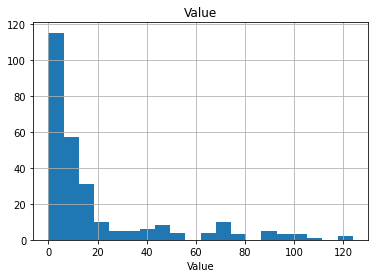

In [58]:
feature_imp = pd.DataFrame({'Value': final_model.feature_importances_, 'Feature': X.columns})
num_summary(feature_imp, "Value", True)
feature_imp[feature_imp["Value"] > 0].shape
feature_imp[feature_imp["Value"] < 1].shape
zero_imp_cols = feature_imp[feature_imp["Value"] < 10]["Feature"].values
selected_cols = [col for col in X.columns if col not in zero_imp_cols]

In [62]:
lgb_random.best_params_

{'reg_lambda': 0.02,
 'reg_alpha': 0.2,
 'num_leaves': 6,
 'n_estimators': 1044,
 'min_sum_hessian_in_leaf': 0.01,
 'min_child_weight': 0.001,
 'min_child_samples': 6,
 'max_depth': 9,
 'max_bin': 32,
 'learning_rate': 0.02,
 'colsample_bytree': 0.1,
 'bagging_freq': 5,
 'bagging_fraction': 0.5}

In [63]:
lgbm_model = LGBMRegressor(random_state=17)

lgbm_params = {"num_leaves" : [6,8],
               "max_depth": [6,9],
               "n_estimators": [1044,1779],
               "min_child_samples": [6,10],
               "reg_alpha": [0.1,0.2],
               "reg_lambda": [0.1,0.02],
               "learning_rate": [0.02],
               "colsample_bytree": [0.2],
               "min_child_weight" : [0.01,0.001],
               "max_bin": [32],
               'bagging_freq': [5],
               'bagging_fraction': [0.5],
              'min_sum_hessian_in_leaf': [0.00245,0.01]
              }

lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X[selected_cols], y)


final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X[selected_cols], y)
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X[selected_cols], y, cv=5, scoring="neg_mean_squared_error")))
rmse

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  6.6min finished


[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.00245, min_child_weight=0.01 will be ignored. Current value: min_sum_hessian_in_leaf=0.00245
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.00245, min_child_weight=0.01 will be ignored. Current value: min_sum_hessian_in_leaf=0.00245
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_he

0.11966642103526866

#######################################
# Sonuçların Yüklenmesi
#######################################

In [ ]:
test_df['Id'] = test_df['ID'].astype('int64')
submission_df = pd.DataFrame()
submission_df['Id'] = test_df["Id"]
y_pred_sub = final_model.predict(test_df[selected_cols])
y_pred_sub = np.expm1(y_pred_sub)
submission_df['SalePrice'] = y_pred_sub
submission_df.to_csv('submission_v9.csv', index=False)

# randomcv RF

In [ ]:
"""

rf_model = RandomForestRegressor(random_state=17)

rf_random_params = {"max_depth": np.random.randint(5, 20, 10),
                    "max_features": np.random.randint(2, 50, 20),
                    "min_samples_split": np.random.randint(2, 20, 10),
                    "n_estimators": [int(x) for x in np.linspace(start=100, stop=1500, num=40)],
                    "min_samples_leaf" : np.random.randint(2, 50, 20),
                    "min_weight_fraction_leaf" : [0.01,0.1,0.2,0.3,0.02,0.5],
                    "min_impurity_decrease":[0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9],
                    "max_samples":[0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9]}


rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_random_params,
                               n_iter=100,  # denenecek parametre sayısı
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)

rf_random.fit(X, y)

# En iyi hiperparametre değerleri:
rf_random.best_params_

# En iyi skor
rf_random.best_score_

"""

# randomcv LGBM

In [ ]:
"""

lgb_model = LGBMRegressor(random_state=17)

lgb_random_params = {"num_leaves" : np.random.randint(2, 10, 5),
                     "max_depth": np.random.randint(2, 20, 10),
                     "n_estimators": [int(x) for x in np.linspace(start=200, stop=2000, num=50)],
                     "min_child_samples": np.random.randint(5, 20, 10),
                     "reg_alpha": [0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9],
                     "reg_lambda": [0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9],
                     "learning_rate": [0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9,1,3,5,7],
                     "colsample_bytree": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                     "min_child_weight" : [0.001,0.01,0.1,0.2,0.3,0.02,0.5,0.7,0.9]}


lgb_random = RandomizedSearchCV(estimator=lgb_model,param_distributions=lgb_random_params,
                                n_iter=100,  # denenecek parametre sayısı
                                cv=3,
                                verbose=True,
                                random_state=42,
                                n_jobs=-1)


lgb_random.fit(X, y)

# En iyi hiperparametre değerleri:
lgb_random.best_params_

# En iyi skor
lgb_random.best_score_

"""

# XGB Random Search

In [ ]:
"""

xgb_model = XGBRegressor(random_state=17, tree_method='gpu_hist')


xgb_random_params = {"max_depth": np.random.randint(2, 20, 20),
                     "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=20)],
                     "min_child_weight": [0.3,0.02,0.5,0.7,0.9],
                     "learning_rate": [0.02,0.5,0.7,0.9],
                     "colsample_bytree": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                     "min_child_weight" : [0.02,0.5,]}


xgb_random = RandomizedSearchCV(estimator=xgb_model,param_distributions=xgb_random_params,
                                n_iter=100,  # denenecek parametre sayısı
                                cv=3,
                                verbose=True,
                                random_state=42,
                                n_jobs=-1)


xgb_random.fit(X, y)


# En iyi hiperparametre değerleri:
xgb_random.best_params_


# En iyi skor
xgb_random.best_score_

"""